In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
Data = pd.read_csv('./heart_cleveland_upload.csv')
Data.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [23]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


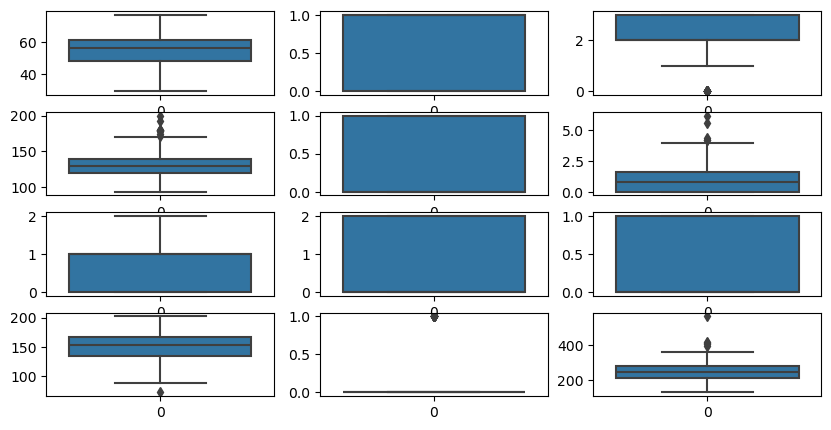

In [24]:
fig, axs = plt.subplots(4,3, figsize = (10,5))
plt1 = sns.boxplot(Data['age'], ax = axs[0,0])
plt2 = sns.boxplot(Data['sex'], ax = axs[0,1])
plt3 = sns.boxplot(Data['cp'], ax = axs[0,2])
plt1 = sns.boxplot(Data['trestbps'], ax = axs[1,0])
plt2 = sns.boxplot(Data['exang'], ax = axs[1,1])
plt3 = sns.boxplot(Data['oldpeak'], ax = axs[1,2])
plt1 = sns.boxplot(Data['slope'], ax = axs[2,0])
plt2 = sns.boxplot(Data['thal'], ax = axs[2,1])
plt3 = sns.boxplot(Data['condition'], ax = axs[2,2])
plt1 = sns.boxplot(Data['thalach'], ax = axs[3,0])
plt2 = sns.boxplot(Data['fbs'], ax = axs[3,1])
plt3 = sns.boxplot(Data['chol'], ax = axs[3,2])

In [25]:
print("Cantidad de Registros nulos en Nivel de age: ",Data['age'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de sex: ",Data['sex'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de cp: ",Data['cp'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de trestbps: ",Data['trestbps'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de exang: ",Data['exang'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de oldpeak: ",Data['oldpeak'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de slope: ",Data['slope'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de thal: ",Data['thal'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de condition: ",Data['condition'].isin([0]).sum())

Cantidad de Registros nulos en Nivel de age:  0
Cantidad de Registros nulos en Nivel de sex:  96
Cantidad de Registros nulos en Nivel de cp:  23
Cantidad de Registros nulos en Nivel de trestbps:  0
Cantidad de Registros nulos en Nivel de exang:  200
Cantidad de Registros nulos en Nivel de oldpeak:  96
Cantidad de Registros nulos en Nivel de slope:  139
Cantidad de Registros nulos en Nivel de thal:  164
Cantidad de Registros nulos en Nivel de condition:  160


In [26]:
Data['sex']=Data['sex'].replace(0,Data['sex'].mean())
Data['cp']=Data['cp'].replace(0,Data['cp'].mean())
Data['exang']=Data['exang'].replace(0,Data['exang'].mean())
Data['oldpeak']=Data['oldpeak'].replace(0,Data['oldpeak'].mean())
Data['slope']=Data['slope'].replace(0,Data['slope'].mean())
Data['thal']=Data['thal'].replace(0,Data['thal'].mean())
Data['condition']=Data['condition'].replace(0,Data['condition'].mean())

In [27]:
print("Cantidad de Registros nulos en Nivel de age: ",Data['age'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de sex: ",Data['sex'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de cp: ",Data['cp'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de trestbps: ",Data['trestbps'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de exang: ",Data['exang'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de oldpeak: ",Data['oldpeak'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de slope: ",Data['slope'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de thal: ",Data['thal'].isin([0]).sum())
print("Cantidad de Registros nulos en Nivel de condition: ",Data['condition'].isin([0]).sum())

Cantidad de Registros nulos en Nivel de age:  0
Cantidad de Registros nulos en Nivel de sex:  0
Cantidad de Registros nulos en Nivel de cp:  0
Cantidad de Registros nulos en Nivel de trestbps:  0
Cantidad de Registros nulos en Nivel de exang:  0
Cantidad de Registros nulos en Nivel de oldpeak:  0
Cantidad de Registros nulos en Nivel de slope:  0
Cantidad de Registros nulos en Nivel de thal:  0
Cantidad de Registros nulos en Nivel de condition:  0


In [28]:
MinAño=35
MaxAño=70
AtipicosAño=((Data['age']<MinAño)|(Data['age']>MaxAño)).sum()
print("El total de datos atípicos en la columna age es de {}".format(AtipicosAño))

Mintrestbps=90
Maxtrestbps=170
Atipicotrestbps=((Data['trestbps']<Mintrestbps)|(Data['trestbps']>Maxtrestbps)).sum()
print("El total de datos atípicos en la columna trestbps es de {}".format(Atipicotrestbps))

Minthalach=60
Maxthalach=190
Atipicothalach=((Data['thalach']<Minthalach)|(Data['thalach']>Maxthalach)).sum()
print("El total de datos atípicos en la columna thalach es de {}".format(Atipicothalach))

Minchol=150
Maxchol=300
Atipichol=((Data['chol']<Minchol)|(Data['chol']>Maxchol)).sum()
print("El total de datos atípicos en la columna chol es de {}".format(Atipichol))

El total de datos atípicos en la columna age es de 9
El total de datos atípicos en la columna trestbps es de 9
El total de datos atípicos en la columna thalach es de 4
El total de datos atípicos en la columna chol es de 49


In [29]:
Data=Data[(Data['age']<MaxAño)&(Data['age']>MinAño)]
Data=Data[(Data['trestbps']<Maxtrestbps)&(Data['trestbps']>Mintrestbps)]
Data=Data[(Data['thalach']<Maxthalach)&(Data['thalach']>Minthalach)]
Data=Data[(Data['chol']<Maxchol)&(Data['chol']>Minchol)]

In [30]:
AtipicosAño=((Data['age']<MinAño)|(Data['age']>MaxAño)).sum()
print("El total de datos atípicos en la columna age es {}".format(AtipicosAño))

Atipicotrestbps=((Data['trestbps']<Mintrestbps)|(Data['trestbps']>Maxtrestbps)).sum()
print("El total de datos atípicos en la columna trestbps es {}".format(Atipicotrestbps))

Atipicothalach=((Data['thalach']<Minthalach)|(Data['thalach']>Maxthalach)).sum()
print("El total de datos atípicos en la columna thalach es {}".format(Atipicothalach))

Atipichol=((Data['chol']<Minchol)|(Data['chol']>Maxchol)).sum()
print("El total de datos atípicos en la columna chol es {}".format(Atipichol))

El total de datos atípicos en la columna age es 0
El total de datos atípicos en la columna trestbps es 0
El total de datos atípicos en la columna thalach es 0
El total de datos atípicos en la columna chol es 0


In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 293
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        222 non-null    int64  
 1   sex        222 non-null    float64
 2   cp         222 non-null    float64
 3   trestbps   222 non-null    int64  
 4   chol       222 non-null    int64  
 5   fbs        222 non-null    int64  
 6   restecg    222 non-null    int64  
 7   thalach    222 non-null    int64  
 8   exang      222 non-null    float64
 9   oldpeak    222 non-null    float64
 10  slope      222 non-null    float64
 11  ca         222 non-null    int64  
 12  thal       222 non-null    float64
 13  condition  222 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 26.0 KB


In [32]:
Data['condition'] = Data['condition'].astype(int)
Data['condition'].value_counts()

condition
0    120
1    102
Name: count, dtype: int64

In [33]:
Data[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


In [34]:
X = Data.drop('condition',axis=1) 
Y = Data['condition'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [35]:
print (y_train)
modelogistico = LogisticRegression(solver = "liblinear") 
modelogistico.fit(X_train, y_train)   
PredicLogistico = modelogistico.predict(X_test)

161    1
109    0
39     0
107    0
48     0
      ..
258    1
270    1
97     0
261    0
122    0
Name: condition, Length: 166, dtype: int32


In [36]:
print (y_test)

82     0
265    0
90     0
291    1
66     0
286    0
63     0
27     0
34     1
292    1
160    1
131    0
142    0
3      1
35     1
198    1
186    1
222    1
147    0
50     0
41     0
216    1
103    1
290    1
120    0
119    0
139    0
280    1
251    0
225    1
152    0
278    0
208    1
272    0
197    1
44     0
252    1
127    0
210    1
174    1
173    1
123    0
256    0
17     0
153    0
145    0
128    1
254    0
80     1
184    1
64     0
112    0
190    1
89     0
250    1
11     1
Name: condition, dtype: int32


In [37]:
print(classification_report(y_test,PredicLogistico))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.73      0.73      0.73        26

    accuracy                           0.75        56
   macro avg       0.75      0.75      0.75        56
weighted avg       0.75      0.75      0.75        56



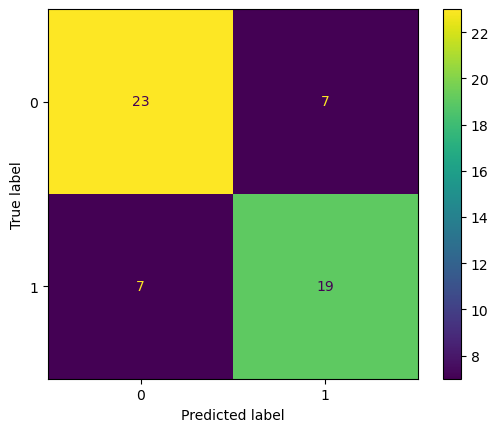

In [38]:
cm=confusion_matrix(y_test,PredicLogistico)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

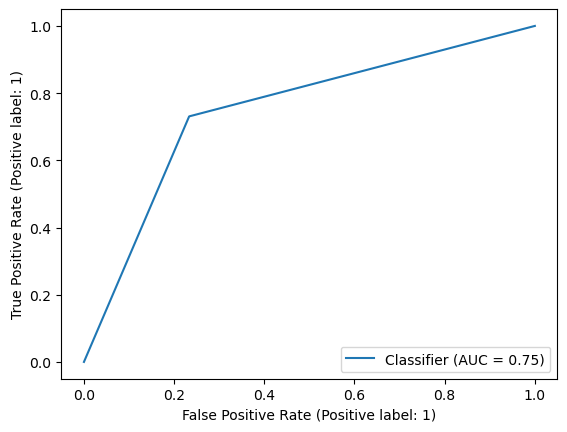

In [39]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, PredicLogistico)
plt.show()